#### Libraries for Model

### Import X,y Data for Train_Test_Split

X=pd.read_csv ('KP_X.csv')
y=pd.read_csv ('KP_y.csv')
y=y.replace(to_replace=np.nan,value=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

### Linear Regression 

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_test.head(),y_pred[0:5]
lr.score(X_train,y_train),lr.score(X_test,y_pred)

from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_pred)

for idx, col_name in enumerate(X_train.columns):
    print("The coeffecient for {} is {}". format(col_name,lr.coef_[0][idx]))
    
col_name in enumerate(y_train.columns)
print("The Intercept for {} is {}". format(col_name,lr.intercept_[0]))

plt.plot(y_pred, 'ro')
plt.plot(y_test, 'go')
#plt.legend()
plt.show()

### Decision Tree

from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(min_samples_split= 2, max_depth = 10, random_state = 80)  
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print('Variance Score Test:', regressor.score(X_train,y_train),regressor.score(X_test,y_pred))

plt.plot(y_pred, 'ro')
plt.plot(y_test, 'go')
#plt.legend()
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [50]:
X=pd.read_csv ('KP_X.csv')
y=pd.read_csv ('KP_y.csv')
y=y.replace(to_replace=np.nan,value=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=90)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((6691, 20), (3297, 20), (6691, 1), (3297, 1))

In [53]:
# Fit regression model
model = ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=5,
    max_features=0.1,
    loss='huber'
)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=5,
                          max_features=0.1, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
print(model.score(X_train, y_train))
y_pred=model.predict(X_test)
print(model.score(X_test,y_pred))

0.6259523686282189
1.0


In [55]:
# Save the trained model to a file so we can use it in other programs
joblib.dump(model, 'KP_classifier_Mdl.pkl')

['KP_classifier_Mdl.pkl']

In [56]:
# Find the error rate on the training set
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.0336


In [57]:
# Find the error rate on the test set
mse = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 0.0537


In [58]:
# Load the model we trained previously
model = joblib.load('KP_classifier_Mdl.pkl')

### Loading Data to check in Model

In [64]:
# Read the Actual dataset using Pandas to check the Models
df_Act = pd.read_csv("WGC_Act.csv")
X=pd.DataFrame(df_Act,index=None, columns=['FCCFPC175.PV','FCCGDI502AM.PV','FCCGFC014.MV','FCCGFC028.MV','FCCGKP501M.PV','FCCGLC501.PV','FCCGPC039.PV','FCCGPDI510.PV','FCCGPI022.PV','FCCGPI023.PV','FCCGPI503.PV','FCCGPI505.PV','FCCGTI507M.PV','FCCGTI518M.PV','FCCGTI521M.PV','FCCGYI501M.PV','FCCGYI503.PV','FCCGYI503M.PV','FCCGYI504.PV','FCCGYI504M.PV'])
y=pd.DataFrame(df_Act,index=None, columns=['FCCGLI510.PV'])

In [60]:
# Run the model and make a prediction for each house in the homes_to_value array
y_pred = model.predict(X)

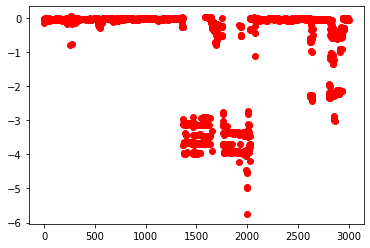

In [61]:
plt.plot(y_pred,"ro")

### Risk Ranking 

In [63]:
# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feauture_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feauture_indexes_by_importance:
    print("{} - {:.2f}%".format(X.columns[index], (importance[index] * 100.0)))

FCCGDI502AM.PV - 0.05%
FCCFPC175.PV - 0.08%
FCCGPI503.PV - 0.20%
FCCGFC014.MV - 0.70%
FCCGPI023.PV - 1.05%
FCCGPI022.PV - 1.57%
FCCGFC028.MV - 2.98%
FCCGTI507M.PV - 3.39%
FCCGYI503.PV - 3.98%
FCCGPI505.PV - 4.23%
FCCGYI504.PV - 4.89%
FCCGTI518M.PV - 5.62%
FCCGTI521M.PV - 5.68%
FCCGLC501.PV - 7.18%
FCCGPC039.PV - 7.21%
FCCGKP501M.PV - 9.53%
FCCGYI501M.PV - 9.73%
FCCGPDI510.PV - 10.12%
FCCGYI503M.PV - 10.45%
FCCGYI504M.PV - 11.37%


#### Compare with actual Y once

In [68]:
y.shape, y.count()

((3000, 1), FCCGLI510.PV    3000
 dtype: int64)

In [77]:
Y=y['FCCGLI510.PV'].diff()/5*60*24*52.5/210/60 #/2
i=0
count=0
for i in range (3000):
    if Y.iloc[i]>0:
        print(i,Y.iloc[i])
        count+=1
        Y.iloc[i]=Y.iloc[i]* -1
        print(i,"th item converted to negative")
print(count, "are the total records converted")

15 0.6
15 th item converted to negative
16 1.2
16 th item converted to negative
17 1.3200000000000016
17 th item converted to negative
18 1.0799999999999983
18 th item converted to negative
19 1.0799999999999983
19 th item converted to negative
20 1.3200000000000016
20 th item converted to negative
21 1.2
21 th item converted to negative
22 1.0800000000000067
22 th item converted to negative
23 0.11999999999999318
23 th item converted to negative
40 0.12000000000001024
40 th item converted to negative
56 0.12000000000001024
56 th item converted to negative
58 0.12000000000001024
58 th item converted to negative
73 0.11999999999999318
73 th item converted to negative
100 0.12000000000001024
100 th item converted to negative
111 0.11999999999999318
111 th item converted to negative
137 0.12000000000000169
137 th item converted to negative
177 0.12000000000000169
177 th item converted to negative
186 0.12000000000000169
186 th item converted to negative
199 0.11999999999999318
199 th item

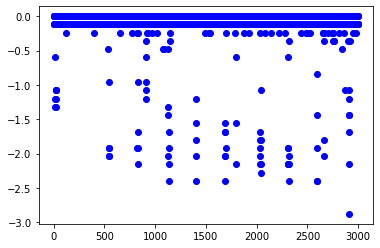

In [78]:
plt.plot(Y,"bo")